## Import tools

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from os import path
from PIL import Image
from sklearn import tree
from sklearn.tree import export_graphviz 
from subprocess import call
import dtreeviz

## Data Extraction

In [109]:
img = Image.open(r"../pics/Guess-Who.jpg")
img.show()

In [105]:
collectedDf = pd.read_csv("../csv/guess_who.csv", sep=";", header=0)
collectedDf.head()

,Name,Bold,Hat,Glasses,Blue Eyes,Moustache,Beard,Brown Hair,Wide Nose,White Hair
0,Alex,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN
1,Alfred,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN
2,Anita,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,Anne,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN
4,Bernard,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN


## Data Cleaning

**Vervang ontbrekende waarden door nul**

In [31]:
cleanedDf = collectedDf.replace(np.nan, 0)
cleanedDf.head()

,Name,Bold,Hat,Glasses,Blue Eyes,Moustache,Beard,Brown Hair,Wide Nose,White Hair
0,Alex,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,Alfred,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,Anita,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,Anne,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,Bernard,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


## Feature Selection

**Maak een lijst van zowel de naam als het nummer van de labels**

In [132]:
classNames = cleanedDf["Name"].to_list()
classPositions = range(0, len(classNames))
classNames

['Alex',
 'Alfred',
 'Anita',
 'Anne',
 'Bernard',
 'Bill',
 'Charles',
 'Claire',
 'David',
 'Eric',
 'Frans',
 'George',
 'Herman',
 'Joe',
 'Maria',
 'Max',
 'Paul',
 'Peter',
 'Phillip',
 'Richard',
 'Robert',
 'Sam',
 'Susan',
 'Tom']

**Maak een selectie van de kolommen**

In [80]:
colNames = ["Name", "Bold", "Hat", "Glasses", "Blue Eyes", "Moustache", "Beard", "Brown Hair", "Wide Nose", "White Hair"]
selectedDf = cleanedDf[colNames]
selectedDf.head()

,Name,Bold,Hat,Glasses,Blue Eyes,Moustache,Beard,Brown Hair,Wide Nose,White Hair
0,Alex,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,Alfred,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,Anita,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,Anne,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,Bernard,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


**Definieer de X (onafhankelijke variabelen) en y (verklarende variabele)**

In [150]:
selectedCols = colNames[1:]
X = selectedDf[selectedCols]
y = classNames

## Train model

In [160]:
features = X
target = y
clf = tree.DecisionTreeClassifier(max_depth=8)
clf.fit(X, y)

DecisionTreeClassifier(max_depth=8)

## Visualize the model

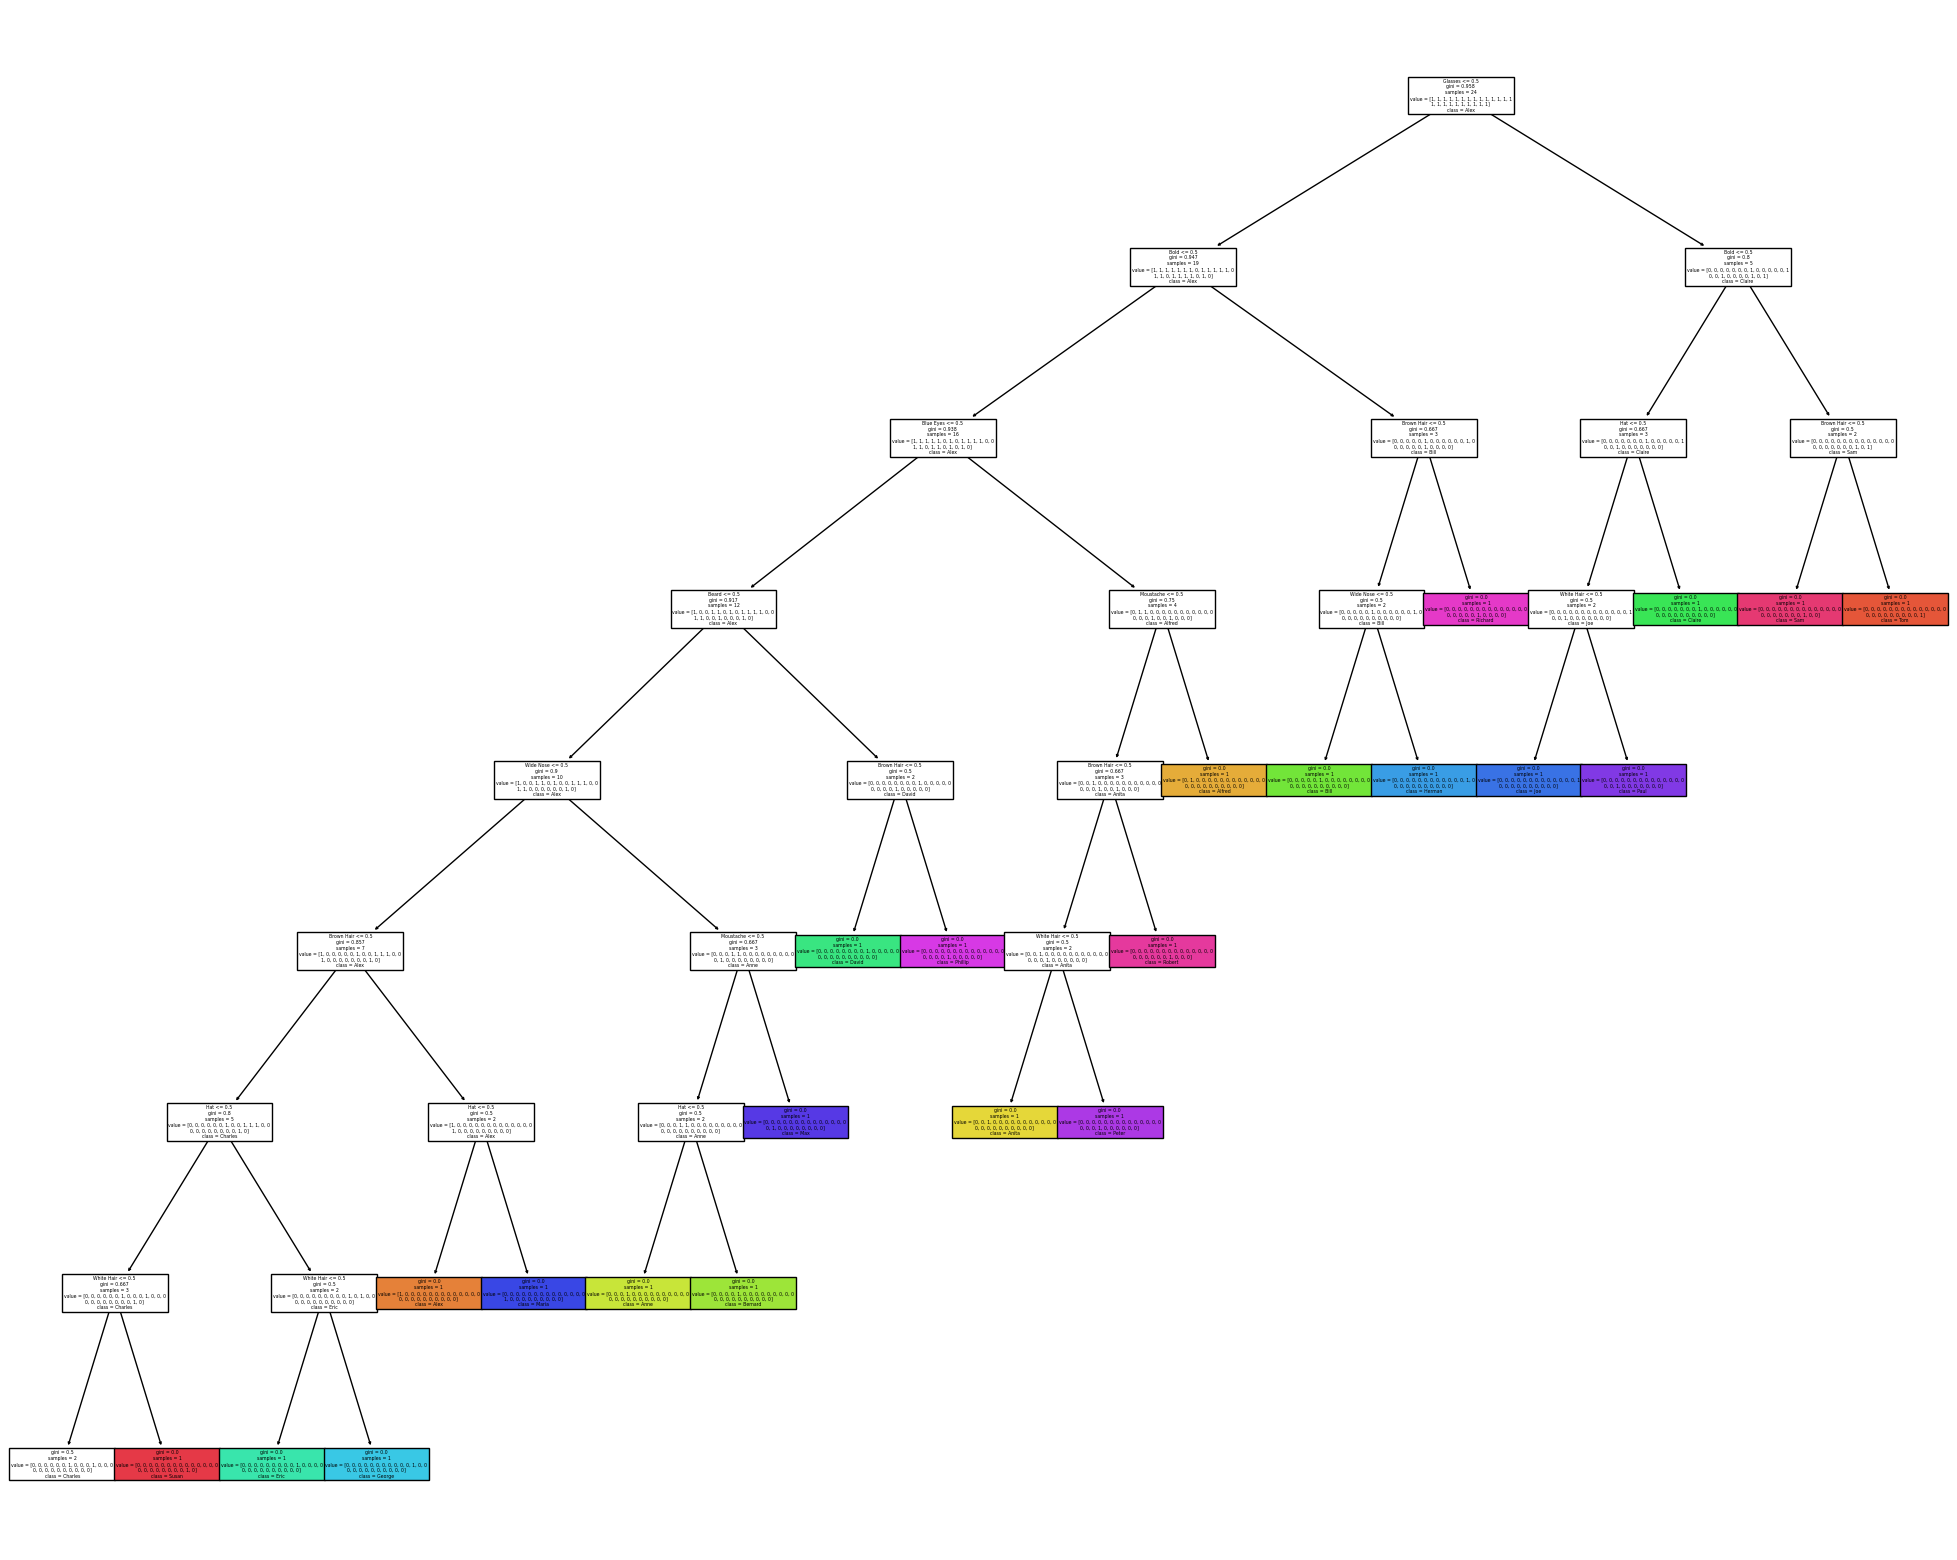

In [152]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf,
                   feature_names = selectedCols,
                   class_names = classNames,
                   filled=True)

In [153]:
def exportTreeToImageFile(filePath, fileName, featureNames, classNames):
    dotFile = os_path.join(filePath, f"{fileName}.dot")
    pngFile = os_path.join(filePath, f"{fileName}.png")                           
    
    export_graphviz(clf, out_file=dotFile, 
                    feature_names = featureNames,
                    class_names = classNames,
                    rounded = True, proportion = True, 
                    precision = 2, filled = True
                   )

    call(['dot', '-Tpng', dotFile, '-o', pngFile, '-Gdpi=350'])

In [182]:
filePath = "../pics"
fileName = "decision_tree"
# pngFile = os_path.join(filePath, f"{fileName}.png")                           
exportTreeToImageFile(filePath, fileName, selectedCols, classNames)
img = Image.open(pngFile)
img.show()

/Users/JABoo/miniconda3/envs/miw3/lib/python3.10/site-packages/PIL/Image.py:3035: DecompressionBombWarning: Image size (162684420 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


## Test the model

In [183]:
selectedDf[selectedCols]

,Bold,Hat,Glasses,Blue Eyes,Moustache,Beard,Brown Hair,Wide Nose,White Hair
0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [199]:
selectedDf[selectedCols].head

<bound method NDFrame.head of     Bold  Hat  Glasses  Blue Eyes  Moustache  Beard  Brown Hair  Wide Nose  \
0    0.0  0.0      0.0        0.0        1.0    0.0         1.0        0.0   
1    0.0  0.0      0.0        1.0        1.0    0.0         0.0        0.0   
2    0.0  0.0      0.0        1.0        0.0    0.0         0.0        0.0   
3    0.0  0.0      0.0        0.0        0.0    0.0         1.0        1.0   
4    0.0  1.0      0.0        0.0        0.0    0.0         1.0        1.0   
5    1.0  0.0      0.0        0.0        0.0    1.0         0.0        0.0   
6    0.0  0.0      0.0        0.0        1.0    0.0         0.0        0.0   
7    0.0  1.0      1.0        0.0        0.0    0.0         0.0        0.0   
8    0.0  0.0      0.0        0.0        0.0    1.0         0.0        0.0   
9    0.0  1.0      0.0        0.0        0.0    0.0         0.0        0.0   
10   0.0  0.0      0.0        0.0        0.0    0.0         0.0        0.0   
11   0.0  1.0      0.0        0.0 

In [186]:
def guessWho(personName):
    idx = classNames.index(personName)
    person = selectedDf[selectedCols[idx]]
    # person = selectedDf[idx:idx+1]
    # return personx
    return clf.predict(person)

In [187]:
print(guessWho("Alex"))
# print(guessWho("Alfred"))
# print(guessWho("Tom"))

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Name
